# Exploratory Data Analysis (EDA)
This notebook contains the exploratory data analysis for the yeast ML project.

## 1. Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2. Load Dataset

In [ ]:
# Load dataset from SVHN_train.csv
data = pd.read_csv('SVHN_train.csv')

## 3. Dataset Overview

In [42]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37233 entries, 0 to 37232
Columns: 3073 entries, pixel1 to digit
dtypes: float64(3072), int64(1)
memory usage: 872.9 MB


In [43]:
# Display first few rows
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,pixel3072,digit
0,161.0,144.0,136.0,158.0,141.0,135.0,152.0,133.0,132.0,146.0,...,120.0,113.0,108.0,107.0,99.0,96.0,100.0,92.0,91.0,9
1,203.0,212.0,209.0,202.0,211.0,206.0,201.0,210.0,204.0,199.0,...,181.0,192.0,193.0,178.0,191.0,190.0,177.0,192.0,189.0,0
2,42.0,49.0,42.0,43.0,47.0,41.0,44.0,46.0,41.0,45.0,...,48.0,37.0,43.0,50.0,39.0,44.0,53.0,42.0,46.0,2
3,118.0,122.0,131.0,120.0,124.0,133.0,121.0,125.0,134.0,121.0,...,50.0,44.0,51.0,58.0,53.0,56.0,70.0,65.0,61.0,3
4,54.0,48.0,58.0,52.0,46.0,56.0,51.0,45.0,55.0,51.0,...,113.0,117.0,120.0,103.0,106.0,111.0,95.0,98.0,105.0,2


In [44]:
# Statistical summary
data.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,pixel3072,digit
count,37233.000000,37233.000000,37233.000000,37233.00000,37233.000000,37233.000000,37233.000000,37233.000000,37233.000000,37233.000000,...,37233.000000,37233.000000,37233.000000,37233.000000,37233.000000,37233.000000,37233.000000,37233.000000,37233.000000,37233.000000
mean,115.135874,114.120968,116.605431,115.11283,114.237773,116.917493,115.158811,114.475788,117.388419,115.243547,...,114.128408,113.825370,117.714501,114.248785,113.758709,117.395671,114.415733,113.787097,117.220127,3.810759
std,53.988558,55.480392,55.191097,53.95690,55.417641,55.098534,54.130700,55.551529,55.133771,54.382207,...,53.797111,55.098413,54.018906,53.636917,54.998425,54.057927,53.663059,55.063770,54.187036,2.689002
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,70.000000,73.000000,74.00000,70.000000,74.000000,74.000000,70.000000,74.000000,73.000000,...,73.000000,70.000000,76.000000,73.000000,70.000000,76.000000,73.000000,70.000000,76.000000,1.000000
50%,114.000000,111.000000,112.000000,114.00000,111.000000,112.000000,114.000000,111.000000,113.000000,114.000000,...,113.000000,111.000000,113.000000,113.000000,111.000000,113.000000,113.000000,111.000000,113.000000,3.000000
75%,152.000000,152.000000,155.000000,152.00000,152.000000,156.000000,153.000000,153.000000,156.000000,153.000000,...,151.000000,152.000000,155.000000,151.000000,152.000000,155.000000,151.000000,152.000000,155.000000,6.000000
max,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,9.000000


## 4. Data Quality Assessment

### 4.1 Duplicate and Missing Values 

In [61]:
# Check for duplicates
print(f"Number of duplicate rows: {data.duplicated().sum()}")

# Check for missing values
print("Missing values:", data.isnull().sum().sum())

Number of duplicate rows: 0
Missing values: 0


## 5. Univariate Analysis

In this case univariate is related to unichannel (from RGB spectrum) considering we are not analyzing pixel by pixel

### 5.1 Class Distribuition (0-9 Digits)

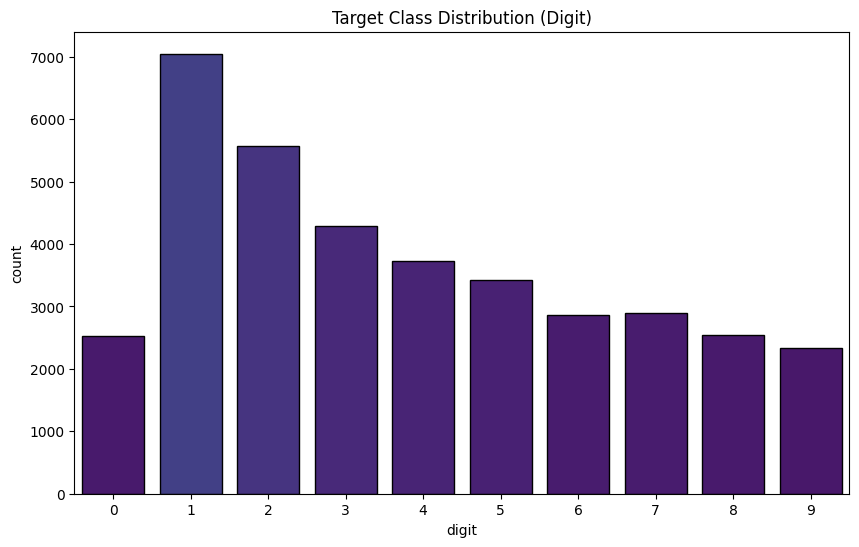

In [54]:
# Analyze target variable distribution
plt.figure(figsize=(10,6))  
sns.countplot(data=data, x=data.columns[-1])
# Gradient color for bars according to frequency
# Possible colormaps: viridis, plasma, inferno, magma, cividis
for i, patch in enumerate(plt.gca().patches):
    height = patch.get_height()
    patch.set_facecolor(plt.cm.viridis(height / data.shape[0]))
    patch.set_edgecolor('black')
    patch.set_linewidth(1)

plt.title('Target Class Distribution (Digit)')
plt.show()


### 5.2 Generate Images from Same Channel Pixels

In [ ]:
# Separar os canais
red_channel = data.iloc[:, 0:1024]
green_channel = data.iloc[:, 1024:2048] 
blue_channel = data.iloc[:, 2048:3072]
labels = data.iloc[:, -1]

Total features: 3072
Esperado para 32x32x3: 3072


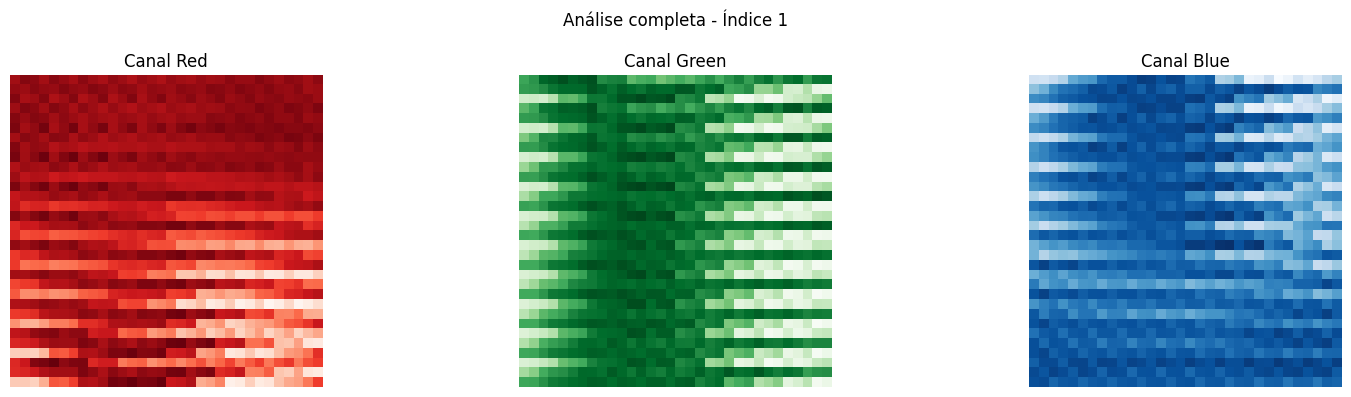

In [ ]:
def display_digit(idx):
    """Mostra a distribuição dos canais RGB em 3 imagens"""
    red = data.iloc[idx, 0:1024].values.reshape(32, 32)
    green = data.iloc[idx, 1024:2048].values.reshape(32, 32)
    blue = data.iloc[idx, 2048:3072].values.reshape(32, 32)
    
    # Mostrar canais separados 
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    
    axes[0].imshow(red, cmap='Reds')
    axes[0].set_title('Canal Red')
    axes[0].axis('off')
    
    axes[1].imshow(green, cmap='Greens')
    axes[1].set_title('Canal Green') 
    axes[1].axis('off')
    
    axes[2].imshow(blue, cmap='Blues')
    axes[2].set_title('Canal Blue')
    axes[2].axis('off')
    
    plt.suptitle(f'Índice {idx}')
    plt.tight_layout()

    plt.show()

# Testa com alguns exemplos
display_digit(1)

### 5.3 RGB Channels Stats

=== ESTATÍSTICAS POR CANAL RGB ===

Red Channel:
  Mean: 115.76
  Std: 53.06
  Min: 0.0
  Max: 255.0
  Mediana: 112.00

Green Channel:
  Mean: 115.70
  Std: 52.87
  Min: 0.0
  Max: 255.0
  Mediana: 112.00

Blue Channel:
  Mean: 115.49
  Std: 52.63
  Min: 0.0
  Max: 255.0
  Mediana: 112.00


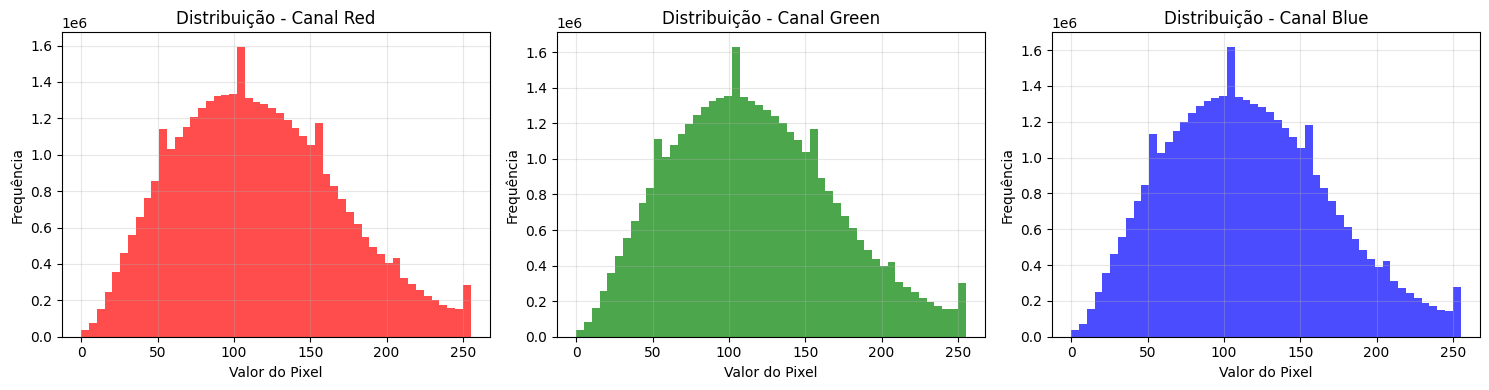

In [45]:
# Estatísticas por canal de cor
channels = {
    'Red': red_channel,
    'Green': green_channel, 
    'Blue': blue_channel
}

print("=== ESTATÍSTICAS POR CANAL RGB ===")
for channel_name, channel_data in channels.items():
    print(f"\n{channel_name} Channel:")
    print(f"  Mean: {channel_data.values.mean():.2f}")
    print(f"  Std: {channel_data.values.std():.2f}")
    print(f"  Min: {channel_data.values.min()}")
    print(f"  Max: {channel_data.values.max()}")
    print(f"  Mediana: {np.median(channel_data.values):.2f}")

# Visualizar distribuição dos valores de pixel por canal
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
colors = ['red', 'green', 'blue']

for i, (channel_name, channel_data) in enumerate(channels.items()):
    axes[i].hist(channel_data.values.flatten(), bins=50, alpha=0.7, color=colors[i])
    axes[i].set_title(f'Distribuição - Canal {channel_name}')
    axes[i].set_xlabel('Valor do Pixel')
    axes[i].set_ylabel('Frequência')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Outlier Detection

## 7. Multivariate Analysis

### 7.1 Variance Analysis (Heatmap)


=== ESTATÍSTICAS DE VARIÂNCIA POR CANAL ===

Red Channel:
  Variância média: 2803.98
  Variância máxima: 3255.04
  Variância mínima: 2248.72
  Desvio padrão: 223.56

Green Channel:
  Variância média: 2780.30
  Variância máxima: 3102.20
  Variância mínima: 2239.67
  Desvio padrão: 197.62

Blue Channel:
  Variância média: 2756.85
  Variância máxima: 3258.75
  Variância mínima: 2193.39
  Desvio padrão: 210.68


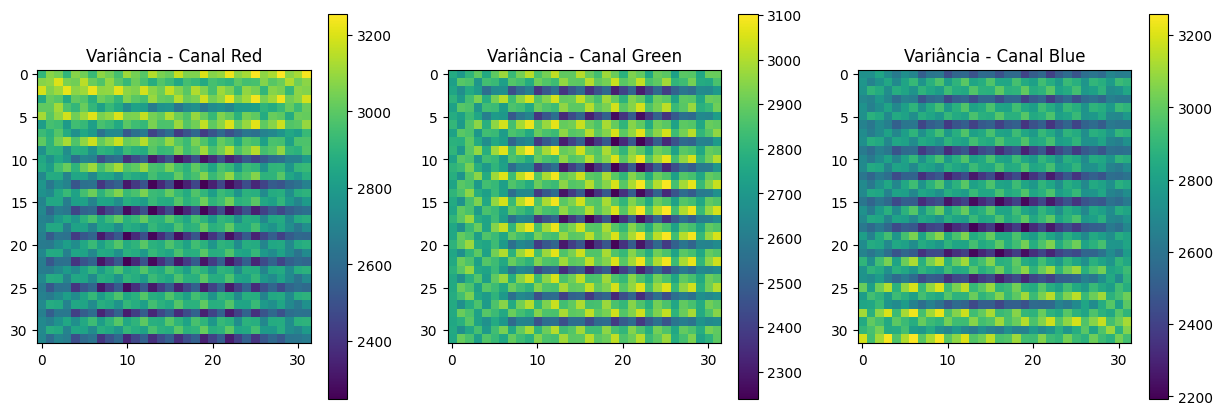

In [58]:
# Variância por posição de pixel (quais regiões são mais informativas)
pixel_variance = data.iloc[:, :-1].var()

# Visualizar como heatmap 32x32 para cada canal
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
channels_var = [
    pixel_variance[:1024].values.reshape(32, 32),
    pixel_variance[1024:2048].values.reshape(32, 32), 
    pixel_variance[2048:3072].values.reshape(32, 32)
]

for i, (var_map, title) in enumerate(zip(channels_var, ['Red', 'Green', 'Blue'])):
    im = axes[i].imshow(var_map, cmap='viridis')
    axes[i].set_title(f'Variância - Canal {title}')
    plt.colorbar(im, ax=axes[i])

print("\n=== ESTATÍSTICAS DE VARIÂNCIA POR CANAL ===")
for i, title in enumerate(titles):
    var_data = channels_var[i]
    print(f"\n{title}:")
    print(f"  Variância média: {var_data.mean():.2f}")
    print(f"  Variância máxima: {var_data.max():.2f}")
    print(f"  Variância mínima: {var_data.min():.2f}")
    print(f"  Desvio padrão: {var_data.std():.2f}")


### 7.2 Channel vs Target Analysis (Heatmap)

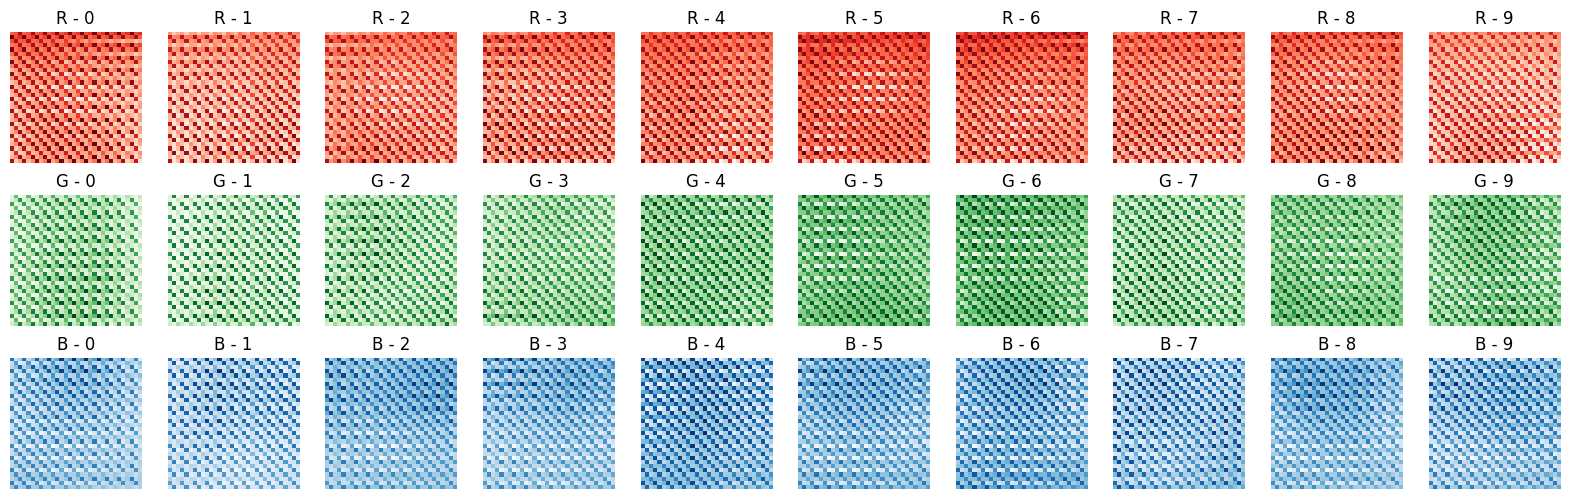

In [55]:
# Heatmap médio por dígito para cada canal
fig, axes = plt.subplots(3, 10, figsize=(20, 6))

for digit in range(10):
    digit_data = data[data.iloc[:, -1] == digit]
    
    # Média de cada canal para este dígito
    red_mean = digit_data.iloc[:, 0:1024].mean().values.reshape(32, 32)
    green_mean = digit_data.iloc[:, 1024:2048].mean().values.reshape(32, 32)
    blue_mean = digit_data.iloc[:, 2048:3072].mean().values.reshape(32, 32)
    
    axes[0, digit].imshow(red_mean, cmap='Reds')
    axes[0, digit].set_title(f'R - {digit}')
    axes[0, digit].axis('off')
    
    axes[1, digit].imshow(green_mean, cmap='Greens')
    axes[1, digit].set_title(f'G - {digit}')
    axes[1, digit].axis('off')
    
    axes[2, digit].imshow(blue_mean, cmap='Blues')
    axes[2, digit].set_title(f'B - {digit}')
    axes[2, digit].axis('off')

### 7.3 Correlation Matrix

## 8. Key Insights and Observations